<a href="https://colab.research.google.com/github/sarakamdod10/Python---Data-Analytics/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
sales_path = '/content/Sales'
file_names = os.listdir(sales_path)

yearly_sales = pd.DataFrame()

for file in file_names:
    temp_dataframe = pd.read_csv(sales_path+"/"+file)
    yearly_sales = pd.concat([yearly_sales,temp_dataframe])
print(yearly_sales.head())
print(yearly_sales.shape)

  Order ID  ...                      Purchase Address
0   162009  ...       942 Church St, Austin, TX 73301
1   162009  ...       942 Church St, Austin, TX 73301
2   162009  ...       942 Church St, Austin, TX 73301
3   162010  ...  261 10th St, San Francisco, CA 94016
4   162011  ...  764 13th St, San Francisco, CA 94016

[5 rows x 6 columns]
(186850, 6)


In [ ]:
#NaN data
yearly_sales[yearly_sales.isna().any(axis=1)] #if whole row in NaN

print(yearly_sales.shape)
yearly_sales = yearly_sales.dropna(how = 'all')
print(yearly_sales.shape)

(186850, 6)
(186305, 6)


In [ ]:
yearly_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [ ]:
print(yearly_sales.shape)
yearly_sales = yearly_sales[yearly_sales['Quantity Ordered'].str[0:1]!='Q']
print(yearly_sales.shape)

(186305, 6)
(185950, 6)


In [ ]:
yearly_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
yearly_sales['Quantity Ordered'] = pd.to_numeric(yearly_sales['Quantity Ordered'])

In [ ]:
yearly_sales.dtypes

Order ID            object
Product             object
Quantity Ordered     int64
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
yearly_sales['Order ID'] = pd.to_numeric(yearly_sales['Order ID'])

In [ ]:
yearly_sales.dtypes

Order ID             int64
Product             object
Quantity Ordered     int64
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
yearly_sales['Price Each'] = pd.to_numeric(yearly_sales['Price Each'])

In [ ]:
yearly_sales.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [ ]:
yearly_sales['Product'] = yearly_sales['Product'].astype(str)

In [ ]:
yearly_sales.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [ ]:
yearly_sales['Month'] = yearly_sales['Order Date'].str[0:2].astype('int8')

In [ ]:
yearly_sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",11
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",11
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",11
17660,295664,Google Phone,1,600.00,11/17/19 16:13,"428 Jackson St, Boston, MA 02215",11


In [ ]:
def get_city(purchase_address): 
    return purchase_address.split(",")[1].strip(" ")

yearly_sales['city'] = yearly_sales['Purchase Address'].apply(get_city)

In [ ]:
yearly_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,San Francisco
...,...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",11,Los Angeles
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11,Austin
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",11,Boston
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",11,Boston


In [ ]:
def get_state(purchase_address): 
    return purchase_address.split(",")[2].split(" ")[1]

yearly_sales['State'] = yearly_sales['Purchase Address'].apply(get_state)

In [ ]:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,State
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,San Francisco,CA
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,San Francisco,CA


In [ ]:
def get_pin(purchase_address): 
    return purchase_address.split(",")[2].split(" ")[2]

yearly_sales['Pin'] = yearly_sales['Purchase Address'].apply(get_pin)

In [ ]:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,State,Pin
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,San Francisco,CA,94016
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,San Francisco,CA,94016


In [ ]:
yearly_sales.describe()

,Order ID,Quantity Ordered,Price Each,Month
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140
std,51512.737110,0.442793,332.731330,3.502996
min,141234.000000,1.000000,2.990000,1.000000
25%,185831.250000,1.000000,11.950000,4.000000
50%,230367.500000,1.000000,14.950000,7.000000
75%,275035.750000,1.000000,150.000000,10.000000
max,319670.000000,9.000000,1700.000000,12.000000


In [ ]:
yearly_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'city', 'State', 'Pin'],
      dtype='object')

In [ ]:
yearly_sales.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                  int8
city                 object
State                object
Pin                  object
dtype: object

In [ ]:
def get_sales(price_each):
  return price_each

yearly_sales['Sales'] = yearly_sales['Quantity Ordered']* yearly_sales['Price Each'].apply(get_sales)

In [ ]:
yearly_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,State,Pin,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,San Francisco,CA,94016,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,San Francisco,CA,94016,379.99
...,...,...,...,...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",11,Los Angeles,CA,90001,5.98
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11,Austin,TX,73301,11.95
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",11,Boston,MA,02215,14.95
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",11,Boston,MA,02215,2.99


In [ ]:
yearly_sales.groupby(['Month']).sum()

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1421630798,10903,1.811768e+06,1.822257e+06
2,1871052592,13449,2.188885e+06,2.202022e+06
3,2564810956,17005,2.791208e+06,2.807100e+06
4,3387347100,20558,3.367671e+06,3.390670e+06
5,3345871523,18667,3.135125e+06,3.152607e+06
6,2932976072,15253,2.562026e+06,2.577802e+06
7,3284139576,16072,2.632540e+06,2.647776e+06
8,2899373917,13448,2.230345e+06,2.244468e+06
9,2948726831,13109,2.084992e+06,2.097560e+06


In [ ]:
yearly_sales.groupby(['Month']).min()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,State,Pin,Sales
Month,,,,,,,,,,
1,141234,20in Monitor,1,2.99,01/01/19 03:07,"1 4th St, Los Angeles, CA 90001",Atlanta,CA,02215,2.99
2,145212,20in Monitor,1,2.99,02/01/19 00:33,"1 Hill St, Boston, MA 02215",Atlanta,CA,02215,2.99
3,150533,20in Monitor,1,2.99,03/01/19 00:29,"1 11th St, Atlanta, GA 30301",Atlanta,CA,02215,2.99
4,162358,20in Monitor,1,2.99,04/01/19 00:00,"1 14th St, New York City, NY 10001",Atlanta,CA,02215,2.99
5,176978,20in Monitor,1,2.99,05/01/19 00:03,"1 7th St, Los Angeles, CA 90001",Atlanta,CA,02215,2.99
6,195748,20in Monitor,1,2.99,06/01/19 00:18,"1 1st St, Dallas, TX 75001",Atlanta,CA,02215,2.99
7,211665,20in Monitor,1,2.99,07/01/19 00:31,"1 4th St, Atlanta, GA 30301",Atlanta,CA,02215,2.99
8,223710,20in Monitor,1,2.99,08/01/19 00:11,"1 2nd St, New York City, NY 10001",Atlanta,CA,02215,2.99
9,238834,20in Monitor,1,2.99,09/01/19 00:25,"1 11th St, San Francisco, CA 94016",Atlanta,CA,02215,2.99


In [ ]:
yearly_sales.groupby(['Month']).max()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,State,Pin,Sales
Month,,,,,,,,,,
1,319366,iPhone,7,1700.0,01/31/19 23:35,"999 Walnut St, San Francisco, CA 94016",Seattle,WA,98101,1999.98
2,162008,iPhone,7,1700.0,02/28/19 23:59,"999 Wilson St, New York City, NY 10001",Seattle,WA,98101,1700.00
3,176557,iPhone,7,1700.0,03/31/19 23:46,"999 Sunset St, Los Angeles, CA 90001",Seattle,WA,98101,1700.00
4,194094,iPhone,7,1700.0,04/30/19 23:49,"999 Pine St, Boston, MA 02215",Seattle,WA,98101,3400.00
5,209920,iPhone,7,1700.0,05/31/19 23:49,"999 Wilson St, Portland, OR 97035",Seattle,WA,98101,3400.00
6,222909,iPhone,9,1700.0,06/30/19 23:56,"999 Wilson St, San Francisco, CA 94016",Seattle,WA,98101,3400.00
7,236669,iPhone,9,1700.0,07/31/19 23:43,"999 Willow St, Seattle, WA 98101",Seattle,WA,98101,1700.00
8,248150,iPhone,8,1700.0,08/31/19 23:57,"999 Sunset St, San Francisco, CA 94016",Seattle,WA,98101,1700.00
9,259357,iPhone,6,1700.0,09/30/19 23:59,"999 Wilson St, Los Angeles, CA 90001",Seattle,WA,98101,1700.00


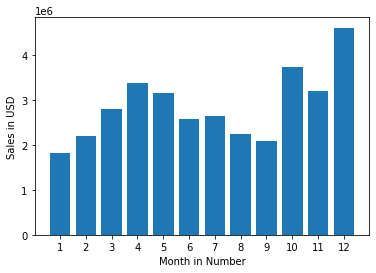

In [ ]:
#Show it in a bar graph

plt.bar(range(1,13),yearly_sales.groupby(['Month']).sum()['Sales'])
plt.xticks(range(1,13))
plt.ylabel('Sales in USD')
plt.xlabel('Month in Number')
plt.show()

In [ ]:
yearly_sales.groupby(['city'])['city']

In [ ]:
yearly_sales.groupby(['city']).sum()

,Order ID,Quantity Ordered,Price Each,Month,Sales
city,,,,,
Atlanta,3423838407,16602,2.779908e+06,104794.0,2.795499e+06
Austin,2280982185,11153,1.809874e+06,69829.0,1.819582e+06
Boston,4598265261,22528,3.637410e+06,141112.0,3.661642e+06
Dallas,3415643578,16730,2.752628e+06,104620.0,2.767975e+06
Los Angeles,6811084693,33289,5.421435e+06,208325.0,5.452571e+06
New York City,5736333884,27932,4.635371e+06,175741.0,4.664317e+06
Portland,2868861092,14053,2.307747e+06,87765.0,2.320491e+06
San Francisco,10304443952,50239,8.211462e+06,315520.0,8.262204e+06
Seattle,3406693974,16553,2.733296e+06,104941.0,2.747755e+06


In [ ]:
yearly_sales.groupby(['city']).sum()

,Order ID,Quantity Ordered,Price Each,Month,Sales
city,,,,,
Atlanta,3423838407,16602,2.779908e+06,104794.0,2.795499e+06
Austin,2280982185,11153,1.809874e+06,69829.0,1.819582e+06
Boston,4598265261,22528,3.637410e+06,141112.0,3.661642e+06
Dallas,3415643578,16730,2.752628e+06,104620.0,2.767975e+06
Los Angeles,6811084693,33289,5.421435e+06,208325.0,5.452571e+06
New York City,5736333884,27932,4.635371e+06,175741.0,4.664317e+06
Portland,2868861092,14053,2.307747e+06,87765.0,2.320491e+06
San Francisco,10304443952,50239,8.211462e+06,315520.0,8.262204e+06
Seattle,3406693974,16553,2.733296e+06,104941.0,2.747755e+06


['Atlanta' 'Austin' 'Boston' 'Dallas' 'Los Angeles' 'New York City'
 'Portland' 'San Francisco' 'Seattle']


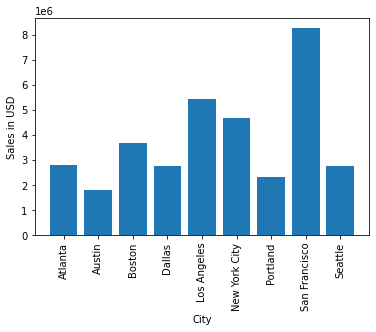

In [ ]:
cities = yearly_sales['city'].unique()
cities.sort()
print(cities)
plt.bar(cities,yearly_sales.groupby(['city']).sum()['Sales'])
plt.xticks(cities,rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

['Atlanta' 'Austin' 'Boston' 'Dallas' 'Los Angeles' 'New York City'
 'Portland' 'San Francisco' 'Seattle']


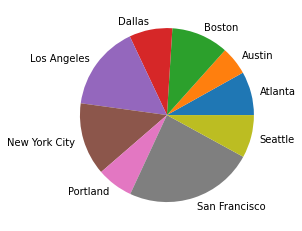

In [ ]:
cities = yearly_sales['city'].unique()
cities.sort()
print(cities)
plt.pie(yearly_sales.groupby(['city']).sum()['Sales'],labels=cities)
plt.show()

The company wants to find out which is the right time to put advertisements on television.

Can you help by analyzing the data and figuring out during which hour most sales are done?

Print as a grid plot

In [ ]:
yearly_sales['Hour'] = pd.to_datetime(yearly_sales['Order Date']).dt.hour

In [ ]:
yearly_sales['Minute'] = pd.to_datetime(yearly_sales['Order Date']).dt.minute

In [ ]:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,State,Pin,Sales,Hour,Minute
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301,700.00,20,59
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301,14.95,20,59
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301,23.98,20,59
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,San Francisco,CA,94016,99.99,5,39
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,San Francisco,CA,94016,379.99,0,1


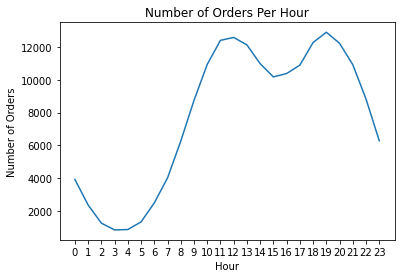

In [ ]:
plt.plot(range(0,24),yearly_sales.groupby(['Hour']).count()['Order ID'])
plt.xticks(range(0,24))
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.title("Number of Orders Per Hour")
plt.show()

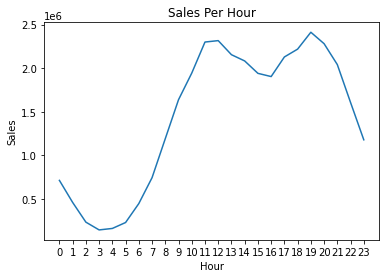

In [ ]:
plt.plot(range(0,24),yearly_sales.groupby(['Hour']).sum()['Sales'])
plt.xticks(range(0,24))
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.title("Sales Per Hour")
plt.show()

In [ ]:
yearly_sales.groupby(['Product']).sum()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,,
20in Monitor,950889651,4129,451068.99,29336.0,454148.71,58764,122252
27in 4K Gaming Monitor,1442588628,6244,2429637.70,44440.0,2435097.56,90916,184331
27in FHD Monitor,1724223743,7550,1125974.93,52558.0,1132424.50,107540,219948
34in Ultrawide Monitor,1418985948,6199,2348718.19,43304.0,2355558.01,89076,183480
AA Batteries (4-pack),4744173938,27635,79015.68,145558.0,106118.40,298342,609039
AAA Batteries (4-pack),4764959472,31017,61716.59,146370.0,92740.83,297332,612113
Apple Airpods Headphones,3579120098,15661,2332350.00,109477.0,2349150.00,223304,455570
Bose SoundSport Headphones,3071496156,13457,1332366.75,94113.0,1345565.43,192445,392603
Flatscreen TV,1110943207,4819,1440000.00,34224.0,1445700.00,68815,142789


['20in Monitor' '27in 4K Gaming Monitor' '27in FHD Monitor'
 '34in Ultrawide Monitor' 'AA Batteries (4-pack)' 'AAA Batteries (4-pack)'
 'Apple Airpods Headphones' 'Bose SoundSport Headphones' 'Flatscreen TV'
 'Google Phone' 'LG Dryer' 'LG Washing Machine' 'Lightning Charging Cable'
 'Macbook Pro Laptop' 'ThinkPad Laptop' 'USB-C Charging Cable'
 'Vareebadd Phone' 'Wired Headphones' 'iPhone']


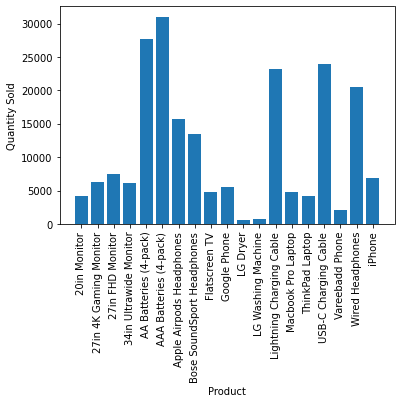

In [ ]:
products = yearly_sales['Product'].unique()
products.sort()
print(products)
plt.bar(products,yearly_sales.groupby(['Product']).sum()['Quantity Ordered'])
plt.xticks(products,rotation='vertical')
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.show()

In [ ]:
mul_orders = yearly_sales[yearly_sales['Order ID'].duplicated(keep=False)]
mul_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,State,Pin,Sales,Hour,Minute
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301,700.00,20,59
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301,14.95,20,59
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,Austin,TX,73301,23.98,20,59
30,162037,iPhone,1,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,Los Angeles,CA,90001,700.00,2,11
31,162037,Lightning Charging Cable,1,14.95,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,Los Angeles,CA,90001,14.95,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17520,295526,27in FHD Monitor,1,149.99,11/21/19 11:26,"550 Park St, Dallas, TX 75001",11,Dallas,TX,75001,149.99,11,26
17528,295534,Google Phone,1,600.00,11/06/19 19:21,"22 Pine St, Boston, MA 02215",11,Boston,MA,02215,600.00,19,21
17529,295534,USB-C Charging Cable,1,11.95,11/06/19 19:21,"22 Pine St, Boston, MA 02215",11,Boston,MA,02215,11.95,19,21
17594,295599,iPhone,1,700.00,11/25/19 21:17,"258 Ridge St, New York City, NY 10001",11,New York City,NY,10001,700.00,21,17


In [ ]:
#Take the above data and find a way to print most commonly bought products

yearly_sales.groupby('Quantity Ordered').Product.value_counts()

Quantity Ordered  Product                   
1                 Lightning Charging Cable      20210
                  USB-C Charging Cable          20019
                  Wired Headphones              17361
                  Apple Airpods Headphones      15438
                  AA Batteries (4-pack)         15333
                  AAA Batteries (4-pack)        13726
                  Bose SoundSport Headphones    13195
                  27in FHD Monitor               7464
                  iPhone                         6835
                  27in 4K Gaming Monitor         6216
                  34in Ultrawide Monitor         6163
                  Google Phone                   5518
                  Flatscreen TV                  4781
                  Macbook Pro Laptop             4720
                  ThinkPad Laptop                4126
                  20in Monitor                   4073
                  Vareebadd Phone                2062
                  LG Washing Machine 